In [1]:
import os, sys
import pandas as pd
import glob
from PIL import Image, ImageDraw, UnidentifiedImageError, ImageOps
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = r"/Users/vijay/Desktop/Fall2020/DIP/Project/archive/dataset/"
result = glob.glob(path + '*.csv')
concat = []
for file in result:
    df = pd.read_csv(file, index_col = None, header=0)
    concat.append(df)
frame = pd.concat(concat, axis=0, ignore_index=True)
frame

,filename,width,height,class,xmin,ymin,xmax,ymax
0,e0e97549fdb8d4325e56d5345df388e7,1800,1200,A10,176,620,1337,904
1,e0e97549fdb8d4325e56d5345df388e7,1800,1200,A10,658,241,1376,583
2,d3bba2d98cc91eed0be188c02eef652b,3788,2029,B1,1256,896,3585,1512
3,d3bba2d98cc91eed0be188c02eef652b,3788,2029,C130,2928,1205,3713,1492
4,d3bba2d98cc91eed0be188c02eef652b,3788,2029,C130,625,1191,1302,1448
...,...,...,...,...,...,...,...,...
5569,a2ef5c7685bcd3724a02e9c945a4d2a7,2100,1500,F18,360,458,2100,982
5570,a2ef5c7685bcd3724a02e9c945a4d2a7,2100,1500,F18,579,226,2100,654
5571,5fcbd1675efbdfc2245d2c9a2ad94372,1600,693,F22,53,130,1483,532
5572,0a36e5862664eb92575949fc3ce7f842,900,600,Mig31,441,291,753,370


In [3]:
frame['area'] = (frame['xmax']-frame['xmin'])*(frame['ymax'] - frame['ymin'])
frame

,filename,width,height,class,xmin,ymin,xmax,ymax,area
0,e0e97549fdb8d4325e56d5345df388e7,1800,1200,A10,176,620,1337,904,329724
1,e0e97549fdb8d4325e56d5345df388e7,1800,1200,A10,658,241,1376,583,245556
2,d3bba2d98cc91eed0be188c02eef652b,3788,2029,B1,1256,896,3585,1512,1434664
3,d3bba2d98cc91eed0be188c02eef652b,3788,2029,C130,2928,1205,3713,1492,225295
4,d3bba2d98cc91eed0be188c02eef652b,3788,2029,C130,625,1191,1302,1448,173989
...,...,...,...,...,...,...,...,...,...
5569,a2ef5c7685bcd3724a02e9c945a4d2a7,2100,1500,F18,360,458,2100,982,911760
5570,a2ef5c7685bcd3724a02e9c945a4d2a7,2100,1500,F18,579,226,2100,654,650988
5571,5fcbd1675efbdfc2245d2c9a2ad94372,1600,693,F22,53,130,1483,532,574860
5572,0a36e5862664eb92575949fc3ce7f842,900,600,Mig31,441,291,753,370,24648


In [4]:
images = glob.glob(path + '*.jpg')
new_path = r"/Users/vijay/Desktop/Fall2020/DIP/Project/cropped_images/"
for image in images:
    name = image.split('/')[9].split('.')[0]
    picture = Image.open(image)
    #print(picture.tile)
    df = frame.loc[frame['filename'] == name]
    new_images = []
    for row in df.iterrows():
        left = row[1]['xmin']
        right = row[1]['xmax']
        top = row[1]['ymax']
        bottom = row[1]['ymin']
        #print(left,right,top,bottom)
        #array = np.asarray(picture)
        #new_im = Image.fromarray(array[top:bottom, left:right, :])
        new_im = picture.crop((left,bottom,right,top))
        #print(new_im.tile)
        #new_im.show()
        new_im.save(new_path + str(row[0]) + '.jpg', 'JPEG')
df

/Users/vijay/anaconda3/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:785: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


OSError: cannot write mode RGBA as JPEG

In [5]:
new_path = r"/Users/vijay/Desktop/Fall2020/DIP/Project/cropped_images/"
images = glob.glob(new_path + '*.jpg')
print(len(images))
ratios = []
for x in images:
    try:
        image = Image.open(x)
    except UnidentifiedImageError:
        print('Bad Picture: ' + x)
    #image.show()
    #new_image = image.resize((200,200))
    #new_image.show()
    ratio = image.size[0] / image.size[1]
    ratios.append(ratio)

4913
Bad Picture: /Users/vijay/Desktop/Fall2020/DIP/Project/cropped_images/1214.jpg


2.3970588235294117


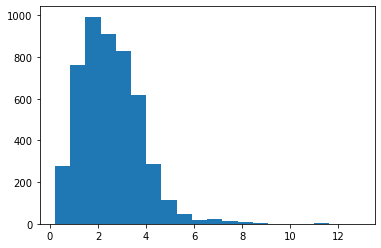

In [6]:
plt.hist(ratios, bins=20)
print(np.median(ratios))

In [7]:
frame = frame.drop(1214)

In [9]:
x = 100
y = 40
new_path = r"/Users/vijay/Desktop/Fall2020/DIP/Project/cropped_images/"
images = glob.glob(new_path + '*.jpg')

new_df = pd.DataFrame()
X = []
labels = []
for i in range(len(images)):
    image = Image.open(images[i])
    ratio = image.size[0]/image.size[1]
    if ratio > 2.5:
        y_change = int(np.rint(x/ratio))
        #print('y_change ' + str(y_change))
        y_border = int(np.ceil((y - y_change)/2))
        #print('y_border ' + str(y_border))
        image = image.resize((x, y_change))
        if y_change%2 != 0:
            image = ImageOps.expand(image, (0,y_border-1,0,y_border))
        else:
            image = ImageOps.expand(image, (0,y_border,0,y_border))
    elif ratio < 2.5:
        x_change = int(np.rint(y*ratio))
        #print('x_change ' + str(x_change))
        x_border = int(np.ceil((x-x_change)/2))
        #print('x_border ' + str(x_border))
        image = image.resize((x_change,y))
        if x_change%2 != 0:
            image = ImageOps.expand(image, (x_border-1,0,x_border,0))
        else:
            image = ImageOps.expand(image, (x_border,0,x_border,0))
    else:
        image = image.resize((x,y))
    #print(image.size)
    #image.show()
    new_image = ImageOps.grayscale(image)
    array_im = np.array(new_image)
    X.append(array_im)
    array_im = np.ravel(array_im)
    array_series = pd.Series(array_im)
    #print(np.unique(array_im))
    new_df = new_df.append(array_series, ignore_index=True)
    index = int(images[i].split('/')[8].split('.')[0])
    label = frame.loc[frame.index == index]
    #print(label['class'].values[0])
    try:
        labels.append(label['class'].values[0])
    except IndexError:
        print(images[i])
labels_series = pd.Series(labels)
new_df.head()
    

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X_numpy = new_df.to_numpy()

In [36]:
X = np.array(X)

In [10]:
cat_labels = pd.get_dummies(labels_series)
cat_labels

,A10,B1,B2,B52,C130,C17,C5,E2,EF2000,F117,...,RQ4,Rafale,SR71,Su57,Tu160,Tu95,U2,V22,XB70,YF23
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4910,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<BarContainer object of 32 artists>

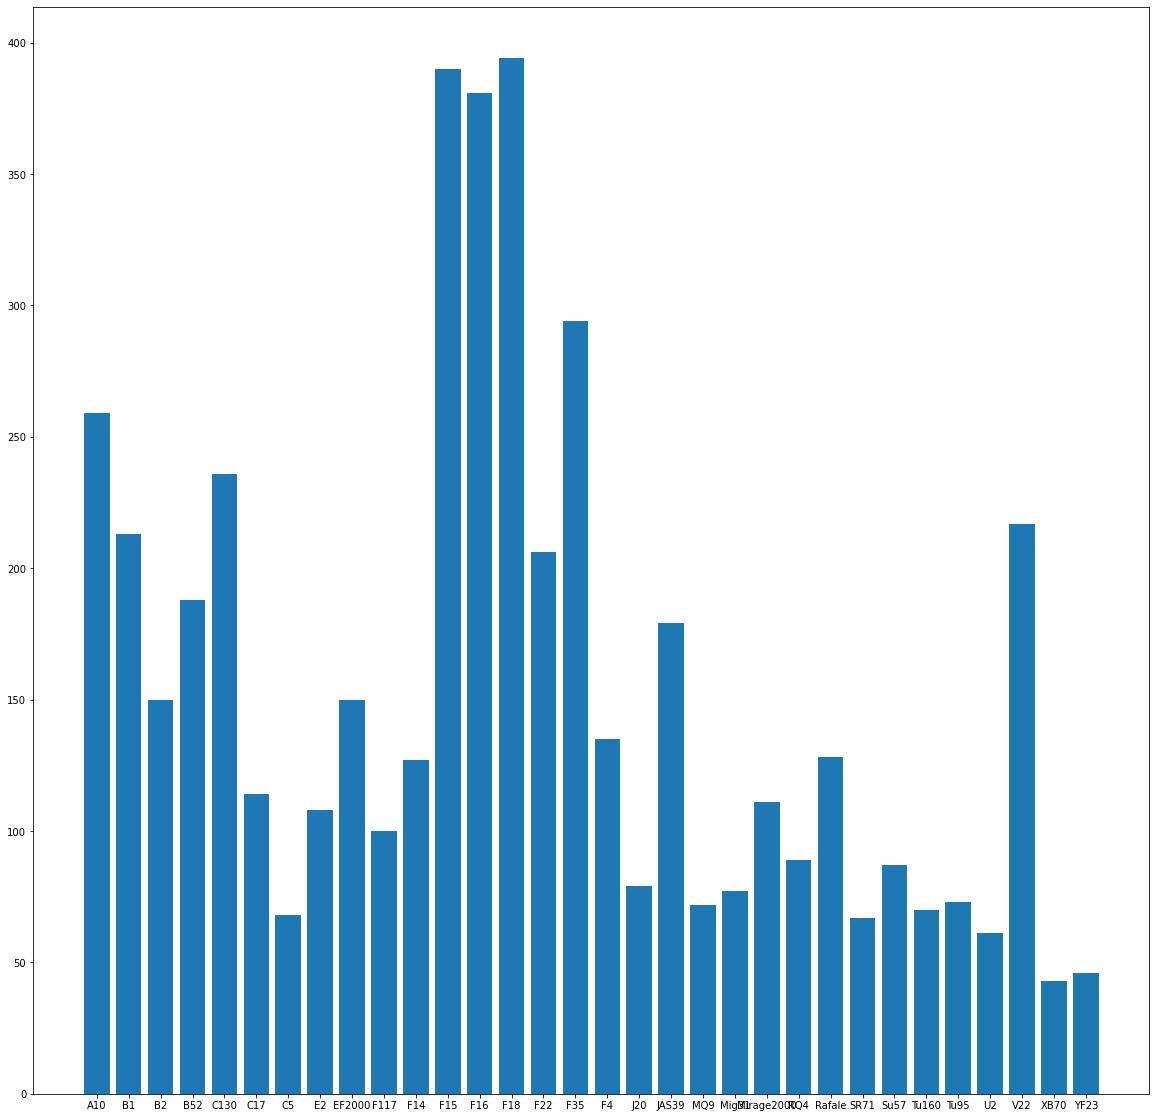

In [113]:
plt.figure(figsize=(20,20))
plt.bar(cat_labels.columns, cat_labels.sum(axis=0))

In [11]:
Y_numpy = cat_labels.to_numpy()
Y_numpy.shape

(4912, 32)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
#import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100,40,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 38, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 19, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 8, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 6, 64)         36928     
_________________________________________________________________
flatten (Flatten)            (None, 8064)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                5

In [51]:
X_reshape = X.reshape(-1,100,40,1)

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X_reshape, Y_numpy, test_size=0.25)

In [56]:
model.compile(
    optimizer='adam', loss='CategoricalCrossentropy', metrics='accuracy'
)

In [57]:
model.fit(x=x_train,y=y_train,epochs=20, validation_data=(x_test,y_test))

Epoch 1/20
116/116 [==============================] - 12s 102ms/step - loss: 1.8057 - accuracy: 0.7688 - val_loss: 1.2274 - val_accuracy: 0.7752
Epoch 2/20
116/116 [==============================] - 12s 101ms/step - loss: 0.6190 - accuracy: 0.8624 - val_loss: 1.2956 - val_accuracy: 0.7793
Epoch 3/20
116/116 [==============================] - 12s 102ms/step - loss: 0.3093 - accuracy: 0.9258 - val_loss: 1.4016 - val_accuracy: 0.7826
Epoch 4/20
116/116 [==============================] - 12s 107ms/step - loss: 0.1763 - accuracy: 0.9606 - val_loss: 1.5147 - val_accuracy: 0.7826
Epoch 5/20
116/116 [==============================] - 12s 107ms/step - loss: 0.0826 - accuracy: 0.9821 - val_loss: 1.5992 - val_accuracy: 0.7858
Epoch 6/20
116/116 [==============================] - 13s 112ms/step - loss: 0.0451 - accuracy: 0.9883 - val_loss: 1.8252 - val_accuracy: 0.7655
Epoch 7/20
116/116 [==============================] - 13s 110ms/step - loss: 0.0234 - accuracy: 0.9958 - val_loss: 1.7632 - val_ac

In [88]:
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [95]:
predictions = model.predict(x_test)
predictions = predictions.argmax(axis=1)
#predictions = predictions.reshape(-1,1)
#enc = OneHotEncoder()
#y_pred = enc.fit_transform(predictions)
#print(y_pred.shape)

#cm = multilabel_confusion_matrix(y_test, y_pred)
#sns.heatmap(cm)

y_test_int = [np.where(r==1)[0][0] for r in y_test]
cm = confusion_matrix(y_test_int, predictions)
print(cm)

[[48  0  0 ...  1  0  0]
 [ 0 37  1 ...  1  1  0]
 [ 0  3 26 ...  0  0  0]
 ...
 [ 0  0  0 ... 41  0  0]
 [ 0  0  0 ...  1  6  0]
 [ 0  1  0 ...  0  0  5]]


In [105]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(20,20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[48  0  0 ...  1  0  0]
 [ 0 37  1 ...  1  1  0]
 [ 0  3 26 ...  0  0  0]
 ...
 [ 0  0  0 ... 41  0  0]
 [ 0  0  0 ...  1  6  0]
 [ 0  1  0 ...  0  0  5]]


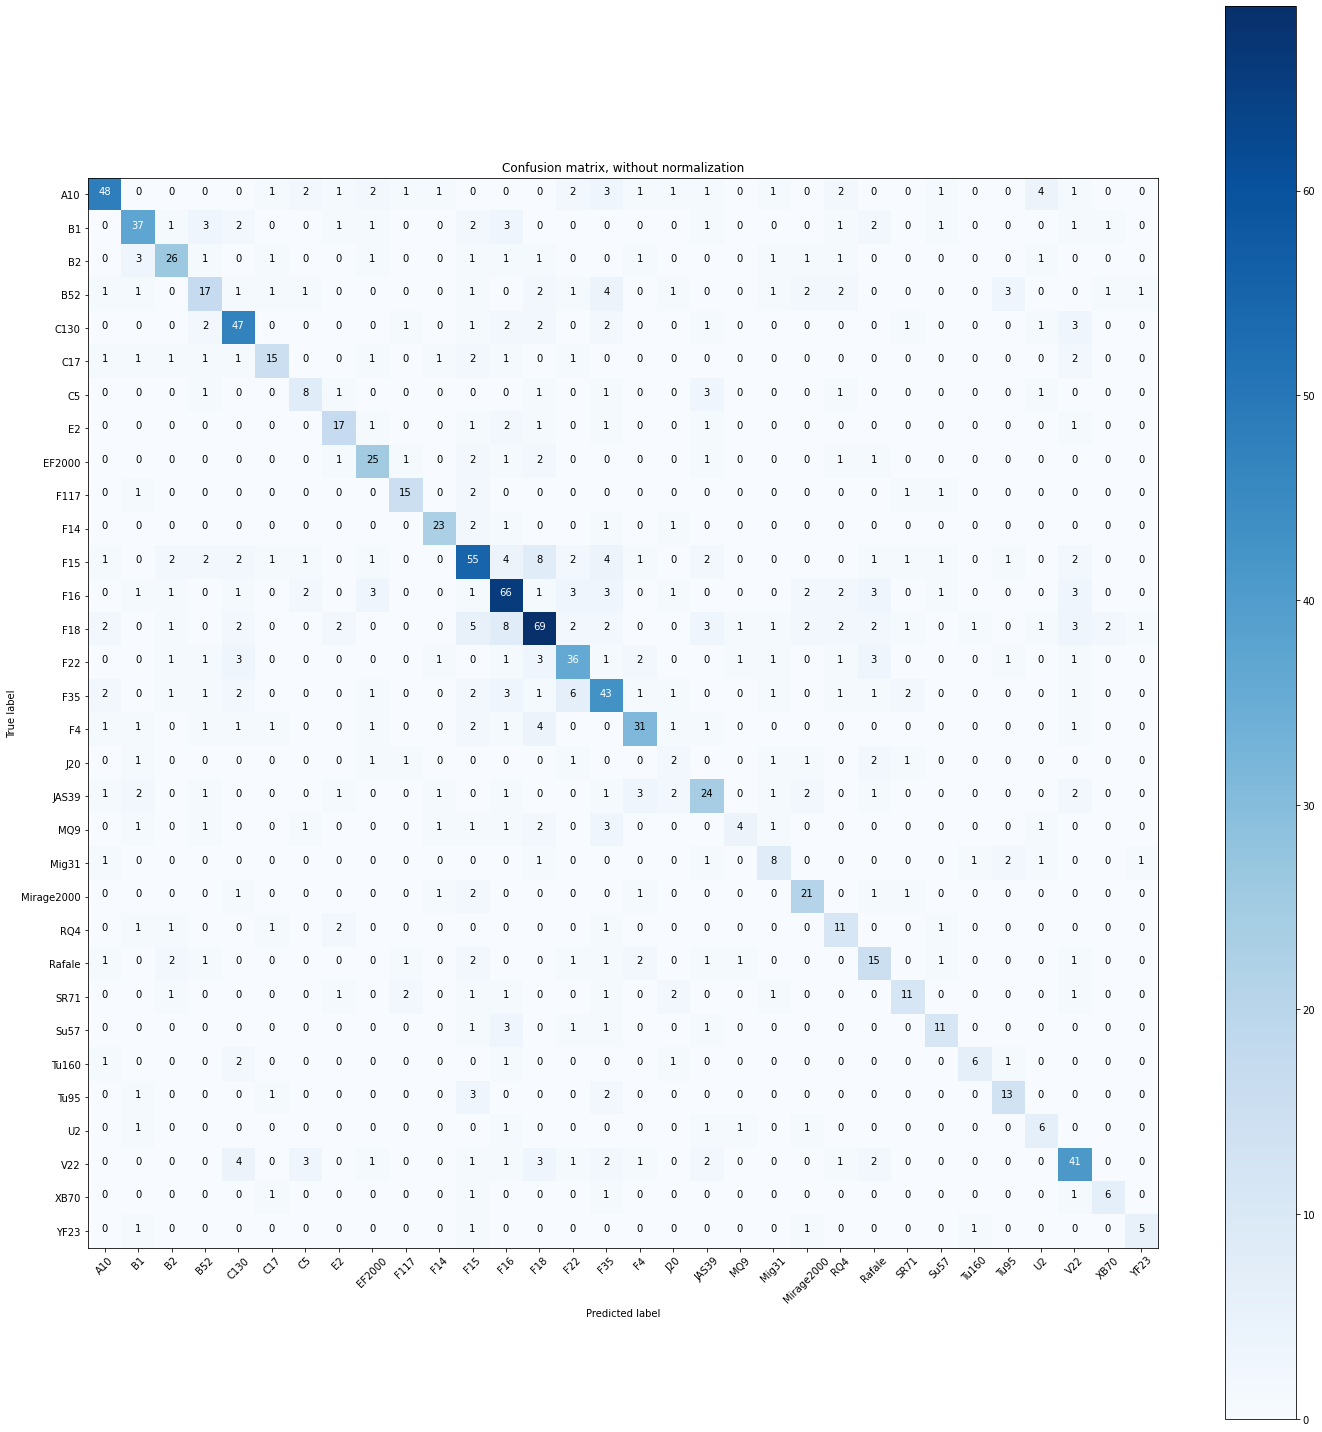

In [106]:
plot_confusion_matrix(cm, classes=cat_labels.columns,
                      title='Confusion matrix, without normalization')